In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import folium
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [19]:
df = pd.read_csv('Data_for_Modeling.csv',index_col=0)
df_cat = df[['traffic_control_device','device_condition','weather_condition','lighting_condition','first_crash_type','trafficway_type','alignment',\
            'roadway_surface_cond','road_defect','crash_type','damage','sec_contributory_cause','most_severe_injury']]
df_num = df[['posted_speed_limit','beat_of_occurrence','injuries_fatal','injuries_incapacitating','injuries_non_incapacitating',\
             'injuries_reported_not_evident','injuries_no_indication','crash_hour','crash_month','crash_day_of_week','num_passengers',\
             'vehicle_defect','sex','age','physical_condition']]
ord_enc = OrdinalEncoder()
df_ordinal = pd.DataFrame(ord_enc.fit_transform(df_cat), columns=df_cat.columns)
df = pd.concat([df_ordinal, df_num, df['prim_contributory_cause']],axis=1)

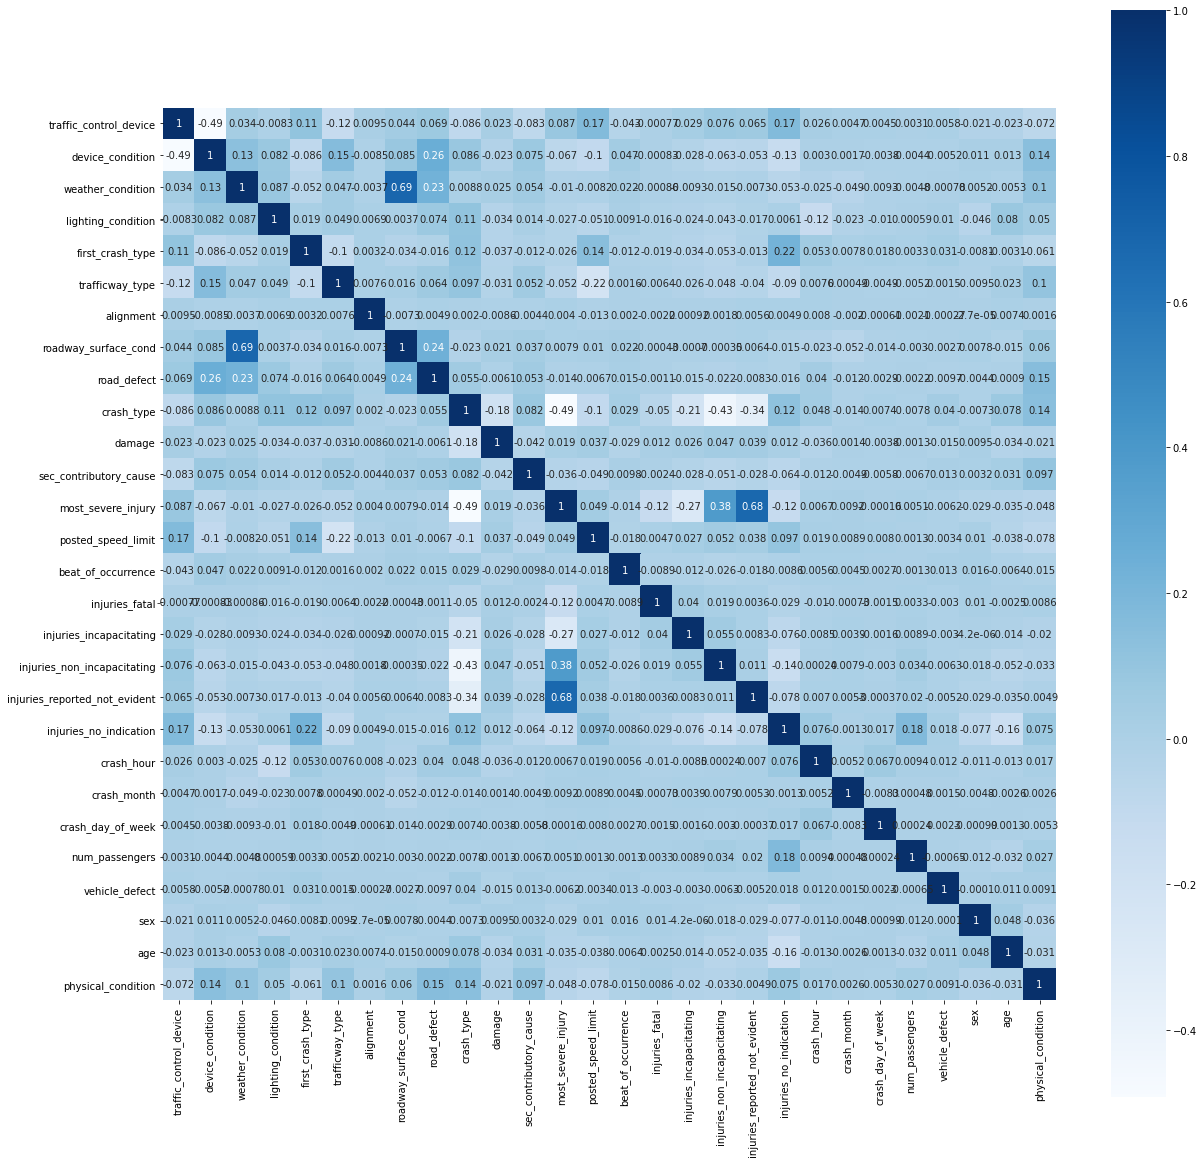

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='Blues',annot=True,square=True)
plt.show()

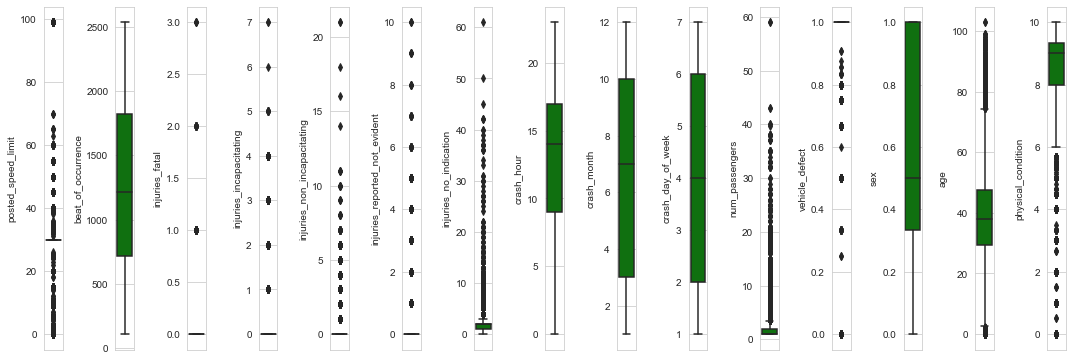

In [20]:
l = df_num.columns.values
number_of_columns=len(l)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

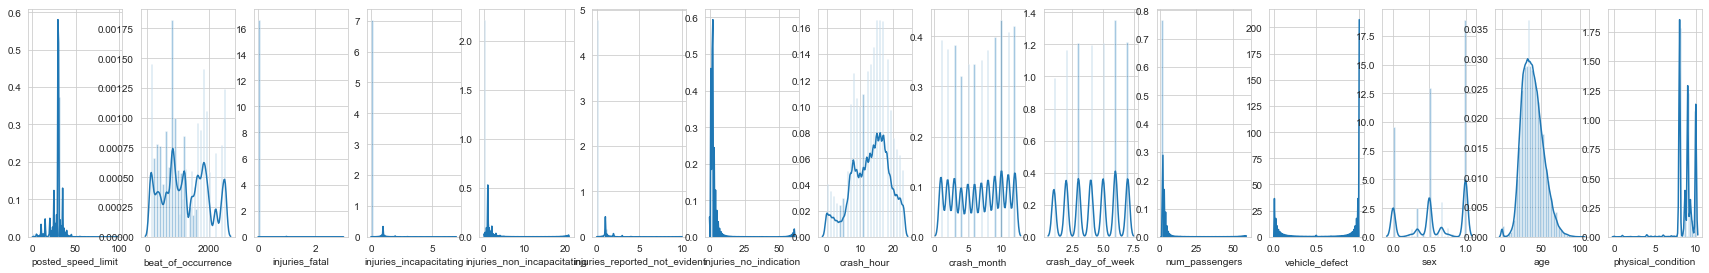

In [21]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_num[l[i]],kde=True) 

In [41]:
df1 = df.loc[df.injuries_incapacitating==0]

In [22]:
df.prim_contributory_cause = pd.DataFrame(ord_enc())

0         non_criminal_driving
1                 undetermined
2                 undetermined
3                 undetermined
4             criminal_driving
                  ...         
394126            undetermined
394127        criminal_driving
394128            undetermined
394129        criminal_driving
394130            undetermined
Name: prim_contributory_cause, Length: 394131, dtype: object

In [43]:
pd.DataFrame(df.loc[df.prim_contributory_cause == 'non_criminal_driving'].crash_day_of_week.value_counts())

,crash_day_of_week
6.0,17841
5.0,15884
7.0,15754
4.0,15653
3.0,15431
2.0,15034
1.0,12998


In [41]:
day_viz = pd.DataFrame({'Day':['Satuday','Friday','Wednesday','Thursday','Sunday','Tuesday','Monday'],\
                        'Criminal Crashes':[17802,15800,15492,15410,15179,14336,11473],\
                        'Non-Criminal Crashes':})

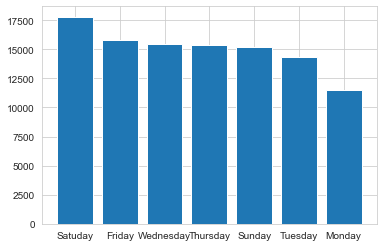

In [42]:
y = day_viz.Crashes
x = day_viz.Day
plt.bar(x,y)
plt.show()

In [25]:
df.physical_condition.value_counts()

8.000000     140131
9.000000      91392
10.000000     84216
8.666667      28410
9.333333      20563
              ...  
9.960000          1
5.142857          1
4.800000          1
9.769231          1
7.142857          1
Name: physical_condition, Length: 146, dtype: int64